In [5]:
from numpy import array
from numpy import argmax
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671)

Graph plot for training and testing data

In [6]:
def graph_plot(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [7]:
dataset = pd.read_csv('nyc_for_ann.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713732 entries, 0 to 1713731
Data columns (total 23 columns):
VendorID                 int64
RatecodeID               int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PUT                      object
DOT                      object
PickUp_hr                int64
TMAX                     int64
day                      int64
month                    int64
ride_time_sec            float64
zone                     int64
dtypes: float64(10), int64(11), object(2)
memory usage: 300.7+ MB


Dropped all the features that has high correlation (refer to the correlation test) and date time value

In [8]:
X = dataset.drop(columns=['dispatch','trip_type', 'VendorID','improvement_surcharge','payment_type','mta_tax','ride_time_sec', 
                         'RatecodeID','tolls_amount','PUT','DOT'],axis=1)
y = dataset['zone']

X.head()

DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
0           217                1           2.90         14.5    0.0   
1            91                6           4.77         16.5    0.5   
2            74                1           1.95         11.5    0.0   
3           217                1           2.20         12.5    0.5   
4             4                1           2.82         13.0    0.5   

   tip_amount  total_amount  PickUp_hr  TMAX  day  month  zone  
0        0.00         15.30         11    33    6      1    65  
1        0.00         17.80         22    33    6      1   181  
2        0.00         12.30         14    33    6      1   166  
3        2.75         16.55         23    33    6      1   112  
4        1.00         15.30         23    33    6      1   255

We decide to randomly drop with the dropout probability some of the values propagated inside our internal dense network of hidden layers. In machine learning, this is a well-known form of regularization

In [9]:
NB_EPOCH = 20
BATCH_SIZE = 128
VALIDATION_SPLIT=0.2
VERBOSE = 1
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
DROPOUT = 0.3

We have to map the zones to distinct categories; example in our target column we have something like 7,7,7,5,6,3,2... which are our zones. Now first we decide how many unique zones/classes are here. Then map each zones to a value here its a vector. Example for zone 7 it would [0,0,0,0,0,0,1,0,0,0,0,0,0,....]

In [10]:
def OneHotEncoding(y):
    data = array(y)
    encoded = to_categorical(data)
    print(np.shape(encoded))
    return encoded

Multilayer Perceptron Model

In [11]:
def model(N_HIDDEN,RESHAPED,NB_CLASSES,OPTIMIZER,DROPOUT):
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy'])
    return model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
RESHAPED = len(X_train.columns)

In [13]:
y_train = OneHotEncoding(y_train)
NB_CLASSES = y_train.shape[1]

(1370985, 261)


In [14]:
model= model(N_HIDDEN,RESHAPED,NB_CLASSES,OPTIMIZER,DROPOUT)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 261)               33669     
_________________________________________________________________
activation_3 (Activation)    (None, 261)               0         
Total para

In [15]:
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 1096788 samples, validate on 274197 samples
Epoch 1/20
1096788/1096788 [==============================] - 25s 23us/step - loss: 1.7181 - acc: 0.3580 - val_loss: 1.4780 - val_acc: 0.4075
Epoch 2/20
1096788/1096788 [==============================] - 23s 21us/step - loss: 1.5081 - acc: 0.4075 - val_loss: 1.3514 - val_acc: 0.4508
Epoch 3/20
1096788/1096788 [==============================] - 23s 21us/step - loss: 1.4210 - acc: 0.4348 - val_loss: 1.2712 - val_acc: 0.4663
Epoch 4/20
1096788/1096788 [==============================] - 23s 21us/step - loss: 1.3526 - acc: 0.4571 - val_loss: 1.1901 - val_acc: 0.5119
Epoch 5/20
1096788/1096788 [==============================] - 23s 21us/step - loss: 1.3027 - acc: 0.4742 - val_loss: 1.1178 - val_acc: 0.5446
Epoch 6/20
1096788/1096788 [==============================] - 23s 21us/step - loss: 1.2681 - acc: 0.4855 - val_loss: 1.1274 - val_acc: 0.5266
Epoch 7/20
1096788/1096788 [==============================] - 23s 21us/step - loss: 1.2399 - ac

KeyboardInterrupt: 

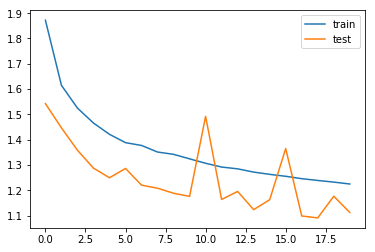

In [12]:
graph_plot(history)

Prediction

In [13]:
y_test = OneHotEncoding(y_test)

(342747, 261)


In [14]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

342747/342747 [==============================] - 10s 28us/step
Test score: 1.1110946155712755
Test accuracy: 0.5441973233910086
